<a href="https://colab.research.google.com/github/reinanovazania/reinanovazania/blob/main/PCA_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(2, 50)


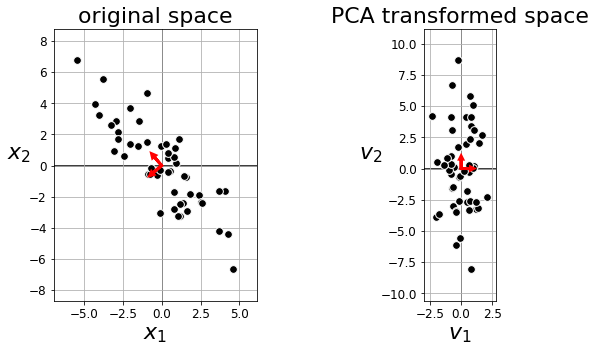

In [ ]:
#reina novazania
#PCA Encoding
import numpy as np
# StringIO behaves like a file object
from io import StringIO    
# This code cell will not be shown in the HTML version of this notebook
import numpy as np
from matplotlib import gridspec
from IPython.display import display, HTML
import copy
import math
import time

# import standard plotting and animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from matplotlib import gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#dataset
#
arr = StringIO("3.103614671100474620e+00,-3.920212845739441399e-01,5.900664319826161019e-01,1.334564157260112127e+00,3.375407991042732370e+00,4.496856127112113910e+00,8.006313498545779339e+00,5.212688446748027005e+00,-8.867317605707834005e-01,7.670488660523690605e+00,4.609385354162145454e-01,3.939027797446633006e+00,1.418367013332479942e-01,3.785092024480358752e+00,1.850347557541932364e+00,3.821882783500246017e+00,4.300339024653172970e+00,2.520886016125453821e+00,-2.034375865683641038e+00,4.969417285009494201e+00,5.782570280824375963e+00,4.176100162216709322e+00,2.635185164453829110e+00,2.718313954843182056e+00,2.460026355844199486e+00,4.558761152700978592e+00,1.958389854735680835e+00,3.822151219593203919e+00,4.762846249579925306e+00,7.435941681148054094e+00,4.543971849826190734e+00,4.413689334451161628e+00,4.164864019781473914e+00,1.323043410493679017e+00,6.090222071493704981e-01,5.000918964832168356e+00,9.801212117668871571e-01,7.091803851282604931e+00,4.832083106572170550e+00,5.943097362060894895e+00,3.664757630739599925e+00,3.313749678481350713e+00,4.263157947973455819e+00,5.971286709556546057e+00,4.189276485761535440e+00,2.451760210978423338e+00,7.071353519940443810e+00,-6.645672011853998029e-01,3.250665761331439807e+00,3.473567017654124456e-01 \n2.277175279294457511e+00,8.470312890775527848e+00,5.047770147313195288e+00,6.605575689879907841e+00,4.191337517143389313e+00,4.584010503247948343e+00,-3.770896502166355191e+00,1.057859628408714725e+00,6.863097737120671837e+00,-1.522814372064106081e+00,5.800838463082995666e+00,2.526674820199340754e+00,5.536939138163470275e+00,3.378437236082383333e+00,4.160410139806846708e+00,2.517510906069120757e+00,3.070340471457909004e+00,2.389426156660144684e+00,9.670696832579793067e+00,2.169201598551822929e+00,1.030022345609314494e+00,3.452584618257285243e+00,2.334684839215904084e+00,2.721661927252226221e+00,4.421421163520189879e+00,-3.406247353392490851e-01,5.741005604938549389e+00,3.700868111903317548e+00,5.199753239864128851e-01,1.296848534631350081e+00,4.619587898203292298e-01,-3.663125759937595483e-01,1.219863251798954051e+00,4.289451336394394687e+00,4.628537686339711854e+00,-3.353263049757249092e-02,3.516808259168762163e+00,-1.269761898474280670e+00,2.206434138003444012e+00,5.727378587405542731e-01,4.271431930623492690e+00,2.632087096589305730e+00,4.042066346239094443e+00,4.862359952919490524e-01,1.130976680507074228e-01,7.594639029748308623e+00,1.281456064462870970e+00,6.185444254526379027e+00,-1.734415182532531574e-01,3.865386831334151729e+00")
lam = 10**-5 # our regularization parameter

# Read data from text file 

# Syntax of NumPy loadtxt() 
X = np.loadtxt(arr,dtype="float",delimiter=",")
print(np.shape(X))

# center an input dataset X
def center(X):
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_centered = X - X_means
    return X_centered
# function for computing principal components of input dataset X
def compute_pcs(X,lam):
    # create the data covariance matrix
    P = float(X.shape[1])
    Cov = 1/P*np.dot(X,X.T) + lam*np.eye(X.shape[0])
    # use numpy function to compute eigenvectors / eigenvalues
    D,V = np.linalg.eigh(Cov)
    return D,V

def pca_transform_data(X,**kwargs):
    '''
    A function for producing the full PCA transformation on an input dataset X.  
    '''
    # user-determined number of principal components to keep, and regularizer penalty param
    num_components = X.shape[0]
    if 'num_components' in kwargs:
        num_components = kwargs['num_components']
    lam = 10**(-7)
    if 'lam' in kwargs:
        lam = kwargs['lam']
    
    # compute principal components
    D,V = compute_pcs(X,lam)
    V = V[:,-num_components:]
    D = D[-num_components:]

    # compute transformed data for PC space: V^T X
    W = np.dot(V.T,X)
    return W,V

 
def pca_visualizer(X,W,pcs):
    # renderer    
    fig = plt.figure(figsize = (10,5))
    
    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 2) 
    ax1 = plt.subplot(gs[0],aspect = 'equal');
    ax2 = plt.subplot(gs[1],aspect = 'equal'); 
                 
    # sphere the results
    ars = np.eye(2)
        
    # loop over panels and plot each 
    c = 1
    for ax,pt,ar in zip([ax1,ax2],[X,W],[pcs,ars]): 
        # set viewing limits for originals
        xmin = np.min(pt[0,:])
        xmax = np.max(pt[0,:])
        xgap = (xmax - xmin)*0.15
        xmin -= xgap
        xmax += xgap
        ymin = np.min(pt[1,:])
        ymax = np.max(pt[1,:])
        ygap = (ymax - ymin)*0.15
        ymin -= ygap
        ymax += ygap
    
        # scatter points
        ax.scatter(pt[0,:],pt[1,:],s = 60, c = 'k',edgecolor = 'w',linewidth = 1,zorder = 2)
   
        # plot original vectors
        vector_draw(ar[:,0].flatten(),ax,color = 'red',zorder = 3)
        vector_draw(ar[:,1].flatten(),ax,color = 'red',zorder = 3)

        # plot x and y axes, and clean up
        ax.grid(True, which='both')
        ax.axhline(y=0, color='k', linewidth=1.5,zorder = 1)
        ax.axvline(x=0, color='k', linewidth=1,zorder = 1)
        ax.set_xlim([xmin,xmax])
        ax.set_ylim([ymin,ymax])
        ax.grid('off')

        # set tick label fonts
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(12) 
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(12) 
        
        # plot title
        if c == 1:
            ax.set_title('original space',fontsize = 22)
            ax.set_xlabel(r'$x_1$',fontsize = 22)
            ax.set_ylabel(r'$x_2$',fontsize = 22,rotation = 0,labelpad = 10)
        if c == 2:
            ax.set_title('PCA transformed space',fontsize = 22)
            ax.set_xlabel(r'$v_1$',fontsize = 22)
            ax.set_ylabel(r'$v_2$',fontsize = 22,rotation = 0,labelpad = 10)
        c+=1
 
# draw a vector
def vector_draw(vec,ax,**kwargs):
    color = 'k'
    if 'color' in kwargs:
        color = kwargs['color']
    zorder = 3 
    if 'zorder' in kwargs:
        zorder = kwargs['zorder']
        
    veclen = math.sqrt(vec[0]**2 + vec[1]**2)
    head_length = 0.25
    head_width = 0.25
    vec_orig = copy.deepcopy(vec)
    vec = (veclen - head_length)/veclen*vec
    ax.arrow(0, 0, vec[0],vec[1], head_width=head_width, head_length=head_length, fc=color, ec=color,linewidth=3,zorder = zorder)
          
# load in dataset to perform PCA on, and mean-center
X_original = X

# mean-center the data
X = center(X_original)

# compute the full PCA transformation of dataset
W,V = pca_transform_data(X)

# plot data in original and pca-transformed spaces
pca_visualizer(X,W,V)

